[1358.282568800829, 1640.7593507320137]
[961.860623827076, 1212.5575796814962]


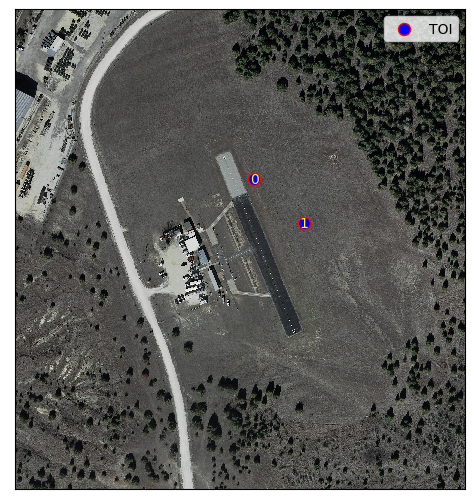

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# All Bold texts are constants decided by the image we acquired

LAT_TOP_LEFT = 30.328463888888887
LONG_TOP_LEFT = -97.60950555555554

LAT_BOT_RIGHT = 30.312166666666666
LONG_BOT_RIGHT = -97.5937611111111

ORIGINAL_IMAGE_WIDTH = 10224 
ORIGINAL_IMAGE_HEIGHT = 11607

IMAGE_WIDTH = 2552
IMAGE_HEIGHT = 2724

TOP_LEFT_CORNER_PIXEL_WIDTH = 2600
TOP_LEFT_CORNER_PIXEL_HEIGHT = 1800

BOTTOM_RIGHT_CORNER_PIXEL_WIDTH = TOP_LEFT_CORNER_PIXEL_WIDTH + IMAGE_WIDTH
BOTTOM_RIGHT_CORNER_PIXEL_WIDTH = TOP_LEFT_CORNER_PIXEL_HEIGHT + IMAGE_HEIGHT

LAT_PER_PIXEL = (LAT_BOT_RIGHT-LAT_TOP_LEFT)/ORIGINAL_IMAGE_HEIGHT
LONG_PER_PIXEL = (LONG_BOT_RIGHT-LONG_TOP_LEFT)/ORIGINAL_IMAGE_WIDTH

LON_TL = TOP_LEFT_CORNER_PIXEL_WIDTH*LONG_PER_PIXEL + LONG_TOP_LEFT
LAT_TL = TOP_LEFT_CORNER_PIXEL_HEIGHT*LAT_PER_PIXEL + LAT_TOP_LEFT

LON_BR = LON_TL + IMAGE_WIDTH*LONG_PER_PIXEL
LAT_BR = LAT_TL + IMAGE_HEIGHT*LAT_PER_PIXEL



def lat_to_y(latitude: float):
    relative_lat = latitude - LAT_TL
    y_pixel = relative_lat/LAT_PER_PIXEL
    return y_pixel

def lon_to_x(longitude: float):
    relative_long = longitude - LON_TL
    x_pixel = relative_long/LONG_PER_PIXEL
    return x_pixel


input = [(30.324586, -97.603410), (30.324234, -97.602975)]
pixel_input_x = []
pixel_input_y = []

for pair in input:
    pixel_input_x.append(lon_to_x(pair[1]))
    pixel_input_y.append(lat_to_y(pair[0]))

print(pixel_input_x)
print(pixel_input_y)


img = plt.imread("cropped-manor-nwc4.tif")
fig, ax = plt.subplots()
ax.imshow(img)
ax.scatter(pixel_input_x, pixel_input_y, color = "Blue", label = "TOI", s = 75,edgecolors="Red")
index = 0
for pixel in pixel_input_x:
    ax.text(pixel_input_x[index], pixel_input_y[index], str(index), color= "Yellow", ha = "center", va = "center")
    index = index + 1


ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

ax.set_xticks([])
ax.set_yticks([])

ax.legend()
ax.plot()

fig.tight_layout()
fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

fig.savefig("GeneratedMap.png")